# EDA on Crime Dataset
--------------------------------


In [ ]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Intro

Whenever I start a class off, I like to make sure that students have basic EDA chops in Python. This semester I picked a structured time series dataset from Wikipedia which tracks violent crime per State over a few years. This homework tests your skill at using data to tell a story about crime in the US. Good luck!

![crime map from Wiki](https://upload.wikimedia.org/wikipedia/commons/5/51/Violent_Crime_Rate_by_U.S._state.svg)

In [ ]:
#I used the pandas library to scrape the table data from the Wikipedia page
# Read the data using head() to execute the first 5 rows of the data for better knowing of the data
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate')[0]
df.head()

State or Territory            2020                     \
     State or Territory Incidence Count Violent Crime Rate   
0                   NaN             NaN                NaN   
1  District of Columbia          7127.0              999.8   
2                Alaska          6126.0              837.8   
3            New Mexico         16393.0              778.3   
4             Tennessee         46328.0              672.7   

  Historical Violent Crime Rates                                         \
                            2019   2018    2017    2016    2015    2014   
0                            NaN    NaN     NaN     NaN     NaN     NaN   
1                         1045.2  997.1  1002.7  1203.5  1269.1  1242.6   
2                          865.0  891.7   856.7   804.6   730.2   635.5   
3                          824.0  842.8   778.6   699.4   656.1   597.7   
4                          598.9  630.4   655.0   638.5   612.1   610.7   

                           
     2013    2012    2011  
0     NaN     NaN     NaN  
1  1281.9  1241.8  1202.1  
2   602.6   604.1   606.5  
3   596.7   559.6   567.5  
4   579.7   638.5   608.2

This dataset had mutli index which is difficult to read the columns while finding the business insights. I decided to collapse the multiple index into readable format

# Q1. Collapse the multi-index
The index is really a double index with two layers - which in my experience is quite annoying in most cases.

In [ ]:
# look at this complicated multiIndex - yuck!
df.columns

MultiIndex([(            'State or Territory', 'State or Territory'),
            (                          '2020',    'Incidence Count'),
            (                          '2020', 'Violent Crime Rate'),
            ('Historical Violent Crime Rates',               '2019'),
            ('Historical Violent Crime Rates',               '2018'),
            ('Historical Violent Crime Rates',               '2017'),
            ('Historical Violent Crime Rates',               '2016'),
            ('Historical Violent Crime Rates',               '2015'),
            ('Historical Violent Crime Rates',               '2014'),
            ('Historical Violent Crime Rates',               '2013'),
            ('Historical Violent Crime Rates',               '2012'),
            ('Historical Violent Crime Rates',               '2011')],
           )

Read these articles then make a single set of sensible column names.
* https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns
* https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas

Like ['State', '2020_incidence_count', '2020_crime_rate', '2019_crime_rate', etc.]

In [ ]:
# I flat multiple index column into single columns for easily readble and interpretable
# It reduces the complexity and more clear visibility of column header
df.columns = df.columns.get_level_values(1)
df.head()

,State or Territory,Incidence Count,Violent Crime Rate,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2


In [ ]:
# Change the year columns like 2020,2019,....2011 into meaningful coulmns to make reader to understand what this column meant for
df= df.rename({'State or Territory':'State_or_Territory',
               'Incidence Count':'2020_Incidence_Count',
            'Violent Crime Rate':'2020_Violent_Crime_Rate',
           '2019':'2019_Violent_Crime_Rate',
           '2018':'2018_Violent_Crime_Rate',
           '2017':'2017_Violent_Crime_Rate',
           '2016':'2016_Violent_Crime_Rate',
           '2015':'2015_Violent_Crime_Rate',
           '2014':'2014_Violent_Crime_Rate',
           '2013':'2013_Violent_Crime_Rate',
           '2012':'2012_Violent_Crime_Rate',
           '2011':'2011_Violent_Crime_Rate'
           },axis=1)

df.head(n=10)

,State_or_Territory,2020_Incidence_Count,2020_Violent_Crime_Rate,2019_Violent_Crime_Rate,2018_Violent_Crime_Rate,2017_Violent_Crime_Rate,2016_Violent_Crime_Rate,2015_Violent_Crime_Rate,2014_Violent_Crime_Rate,2013_Violent_Crime_Rate,2012_Violent_Crime_Rate,2011_Violent_Crime_Rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2
5,Arkansas,20363.0,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6,480.9
6,Arizona,35980.0,654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6,405.9
7,Louisiana,29704.0,639.4,559.7,543.3,556.3,565.0,539.7,515.9,510.4,496.3,555.3
8,Missouri,33385.0,542.7,499.6,501.4,531.2,520.8,497.4,443.3,422.0,451.3,447.4
9,South Carolina,27691.0,530.7,510.1,500.8,506.1,506.8,504.5,497.8,494.8,560.5,571.9


# Q2. What is the shape of the dataframe?
State the number of rows and number of columns.

In [ ]:
# The format is (rows, columns)
# The DataFrame had 54 rows and 12 columns
df.shape

(54, 12)

The DataFrame had 54 rows and 12 columns

# Q3. Count the number of missing values per column, then print a list of unique values for the State/territory column.

In [ ]:
# I used the isnull() fucntion to know missing/null values in each column in the dataset
print("No of missing values per columns \n")
df.isnull().sum()

No of missing values per columns 



State_or_Territory         1
2020_Incidence_Count       1
2020_Violent_Crime_Rate    1
2019_Violent_Crime_Rate    1
2018_Violent_Crime_Rate    1
2017_Violent_Crime_Rate    1
2016_Violent_Crime_Rate    1
2015_Violent_Crime_Rate    1
2014_Violent_Crime_Rate    1
2013_Violent_Crime_Rate    1
2012_Violent_Crime_Rate    1
2011_Violent_Crime_Rate    1
dtype: int64

In [ ]:
df["State_or_Territory"].unique()

array([nan, 'District of Columbia', 'Alaska', 'New Mexico', 'Tennessee',
       'Arkansas', 'Arizona', 'Louisiana', 'Missouri', 'South Carolina',
       'South Dakota', 'Michigan', 'Montana', 'Nevada', 'Oklahoma',
       'Alabama', 'Texas', 'California', 'Delaware', 'Illinois', 'Kansas',
       'Colorado', 'North Carolina', 'Georgia', 'Maryland',
       'Pennsylvania', 'Florida', 'New York', 'Indiana', 'West Virginia',
       'Nebraska', 'North Dakota', 'Wisconsin', 'Ohio', 'Massachusetts',
       'Iowa', 'Washington', 'Oregon', 'Mississippi', 'Minnesota', 'Utah',
       'Kentucky', 'Hawaii', 'Idaho', 'Wyoming', 'Rhode Island',
       'Virginia', 'New Jersey', 'Connecticut', 'Vermont', 'Puerto Rico',
       'New Hampshire', 'Maine', 'United States'], dtype=object)

Read this:
* https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

Now drop any rows where the 'State or Territory' column is nan.

In [ ]:
# I drop the rows where column had null values to make sure that dataset shouldnot have missing values to do furthur analysis
df= df.dropna(subset = ['State_or_Territory'])
df.head()

,State_or_Territory,2020_Incidence_Count,2020_Violent_Crime_Rate,2019_Violent_Crime_Rate,2018_Violent_Crime_Rate,2017_Violent_Crime_Rate,2016_Violent_Crime_Rate,2015_Violent_Crime_Rate,2014_Violent_Crime_Rate,2013_Violent_Crime_Rate,2012_Violent_Crime_Rate,2011_Violent_Crime_Rate
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2
5,Arkansas,20363.0,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6,480.9


In [ ]:
# Re-Check the dataset to check whether null values still exits in 'state_or_Territory' column or not
df.isnull().sum() # Zero Null values are found in the dataset

State_or_Territory         0
2020_Incidence_Count       0
2020_Violent_Crime_Rate    0
2019_Violent_Crime_Rate    0
2018_Violent_Crime_Rate    0
2017_Violent_Crime_Rate    0
2016_Violent_Crime_Rate    0
2015_Violent_Crime_Rate    0
2014_Violent_Crime_Rate    0
2013_Violent_Crime_Rate    0
2012_Violent_Crime_Rate    0
2011_Violent_Crime_Rate    0
dtype: int64

Read this:
* https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

Now drop values where this column is equal to District of Columbia, United States or Puerto Rico. How many rows do you have now?

In [ ]:
# Using single parameter filtering, i filter the dataframe on the basis of State_or_Territory where it doesnot contain specific districts
tmp1 = df[~df["State_or_Territory"].isin(['District of Columbia','United States','Puerto Rico'])]
tmp1.head()

,State_or_Territory,2020_Incidence_Count,2020_Violent_Crime_Rate,2019_Violent_Crime_Rate,2018_Violent_Crime_Rate,2017_Violent_Crime_Rate,2016_Violent_Crime_Rate,2015_Violent_Crime_Rate,2014_Violent_Crime_Rate,2013_Violent_Crime_Rate,2012_Violent_Crime_Rate,2011_Violent_Crime_Rate
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2
5,Arkansas,20363.0,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6,480.9
6,Arizona,35980.0,654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6,405.9


In [ ]:
# Count the no of rows and columns present in dataset after filtering based on above conditions
tmp1.shape

(50, 12)

After filtering the data set based on the conditon we had 50 rows and 12 columns instead of 54 rows and 12 columns in a original dataset

# Q4. Which State had the highest and lowest crime rate in 2020?

You can either sort by high and low to show the tail, or you can select the row where the min and max 2020 rates exist. Do not just print the value of the min and max!

In [ ]:
# Executed the highest and lowest states crime_rate occured in 2019 & 2020
highest_crime_state = tmp1.loc[tmp1['2020_Violent_Crime_Rate'].idxmax()][['State_or_Territory','2020_Violent_Crime_Rate']]
lowest_crime_state = tmp1.loc[tmp1['2020_Violent_Crime_Rate'].idxmin()][['State_or_Territory','2020_Violent_Crime_Rate']]

print("Highest crime rate state 2020: \n",highest_crime_state)
print("Lowestcrime rate state 2020: \n",lowest_crime_state)

Highest crime rate state 2020: 
 State_or_Territory         Alaska
2020_Violent_Crime_Rate     837.8
Name: 2, dtype: object
Lowestcrime rate state 2020: 
 State_or_Territory         Maine
2020_Violent_Crime_Rate    108.6
Name: 52, dtype: object


Alaska state is on top having higher crime_rate compared to other states where as Maine is safe and having lowest crime_rate.

# Q5. Make a line plot that shows the trend of violent crime in Alaska.
One plot for each State. X = year and Y = violent crime. Have nice titles, axes and a unique color for each plot. Note that this question probably requires you to take the transpose or to create a pivot table (your choice.)

In [ ]:
f = df.loc[df['State_or_Territory']=='Alaska']
f = f.T
print(f)

                              2
State_or_Territory       Alaska
2020_Incidence_Count     6126.0
2020_Violent_Crime_Rate   837.8
2019_Violent_Crime_Rate   865.0
2018_Violent_Crime_Rate   891.7
2017_Violent_Crime_Rate   856.7
2016_Violent_Crime_Rate   804.6
2015_Violent_Crime_Rate   730.2
2014_Violent_Crime_Rate   635.5
2013_Violent_Crime_Rate   602.6
2012_Violent_Crime_Rate   604.1
2011_Violent_Crime_Rate   606.5


In [ ]:
f.iloc[2:]

,2
2020_Violent_Crime_Rate,837.8
2019_Violent_Crime_Rate,865.0
2018_Violent_Crime_Rate,891.7
2017_Violent_Crime_Rate,856.7
2016_Violent_Crime_Rate,804.6
2015_Violent_Crime_Rate,730.2
2014_Violent_Crime_Rate,635.5
2013_Violent_Crime_Rate,602.6
2012_Violent_Crime_Rate,604.1
2011_Violent_Crime_Rate,606.5


In [ ]:
# filter the state_or_territory column to get the 'alaska' state each year's violent crime rate deatils
f2 = df[df["State_or_Territory"].isin(['Alaska'])]
f2

,State_or_Territory,2020_Incidence_Count,2020_Violent_Crime_Rate,2019_Violent_Crime_Rate,2018_Violent_Crime_Rate,2017_Violent_Crime_Rate,2016_Violent_Crime_Rate,2015_Violent_Crime_Rate,2014_Violent_Crime_Rate,2013_Violent_Crime_Rate,2012_Violent_Crime_Rate,2011_Violent_Crime_Rate
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5


In [ ]:
# to draw the line graph, I interchange the position of rows and columns using the transpose fucntion
tmp2 = f2.T
tmp2

,2
State_or_Territory,Alaska
2020_Incidence_Count,6126.0
2020_Violent_Crime_Rate,837.8
2019_Violent_Crime_Rate,865.0
2018_Violent_Crime_Rate,891.7
2017_Violent_Crime_Rate,856.7
2016_Violent_Crime_Rate,804.6
2015_Violent_Crime_Rate,730.2
2014_Violent_Crime_Rate,635.5
2013_Violent_Crime_Rate,602.6


In [ ]:
# the top 2 rows are not required to incoporated in line grahp
# I use iloc function to select rows and columns based on thier position
tmp= tmp2.iloc[2:]
tmp

,2
2020_Violent_Crime_Rate,837.8
2019_Violent_Crime_Rate,865.0
2018_Violent_Crime_Rate,891.7
2017_Violent_Crime_Rate,856.7
2016_Violent_Crime_Rate,804.6
2015_Violent_Crime_Rate,730.2
2014_Violent_Crime_Rate,635.5
2013_Violent_Crime_Rate,602.6
2012_Violent_Crime_Rate,604.1
2011_Violent_Crime_Rate,606.5


In [ ]:
# The index looks so distracted and not well defined so I reset index into numerical
# Rename the column into readle and understable way so that any reader from non technical backkgroud cannot feel uncomfortable
# Every column name is so long which is difficult in handling all this 10 year's names in line graph because of space between each scale
tmp3= tmp.rename({2:'Alaska_CrimeRate'}, axis=1)
tmp3.reset_index(drop=True, inplace=True)
year= [2020,2019,2018,2017,2016,2015,2014,2013,2012,2011]
tmp3["Year"] = year
tmp3

,Alaska_CrimeRate,Year
0,837.8,2020
1,865.0,2019
2,891.7,2018
3,856.7,2017
4,804.6,2016
5,730.2,2015
6,635.5,2014
7,602.6,2013
8,604.1,2012
9,606.5,2011


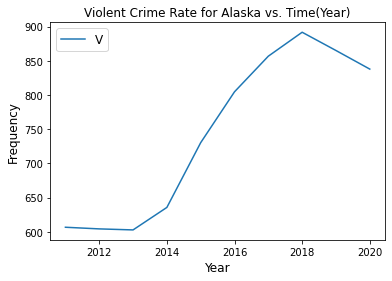

In [ ]:
# Plotted line graph between each year crime rate in alaska state
# In x-axis we had timeline i.e. Year's and y-axis we had Alaska state crime_rate
plt.plot(tmp3["Year"], tmp3["Alaska_CrimeRate"])
plt.xlabel("Year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Violent Crime Rate for Alaska vs. Time(Year)")
plt.legend("Violent Crime Rate", loc='upper left',fontsize=12)
plt.show()

We can see that there is steady growth of crime_rates in alaska from 2011 to 2018 but from 2019-2020 there is steep drop in crime_rates which is a positive sign.

# Q6. Which States had crime rates go down in 2020 vs. 2019?

Print the unique values in the State column after you do your subset.

In [ ]:
# subset the crime_rate between 2020-2019 based on decrease of crime_rates to figureout which states crime_rates go down
data = tmp1[tmp1['2020_Violent_Crime_Rate']-tmp1['2019_Violent_Crime_Rate'] < 0]['State_or_Territory']
print("States where crime rates go down in 2020 vs 2019: \n", data.unique())

States where crime rates go down in 2020 vs 2019: 
 ['Alaska' 'New Mexico' 'Nevada' 'Alabama' 'California' 'Maryland'
 'Indiana' 'Massachusetts' 'Washington' 'Oregon' 'Hawaii' 'Virginia'
 'New Jersey' 'Connecticut' 'Vermont' 'New Hampshire' 'Maine']


# Q7. Compute the raw change between 2020 and 2019 for all States and print summary statistics.
This one should have the raw units of Y - add a text cell and describe what you see in the summary statistics output.

In [ ]:
# created a new column for recording the changes of crime_rates in all states between 2020 and 2019
tmp1["Difference_in_crime_rate(2020_2019)"] = (tmp1["2020_Violent_Crime_Rate"]-tmp1["2019_Violent_Crime_Rate"])
tmp1.head()

<ipython-input-20-b25cb2e83c18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1["Difference_in_crime_rate(2020_2019)"] = (tmp1["2020_Violent_Crime_Rate"]-tmp1["2019_Violent_Crime_Rate"])


,State_or_Territory,2020_Incidence_Count,2020_Violent_Crime_Rate,2019_Violent_Crime_Rate,2018_Violent_Crime_Rate,2017_Violent_Crime_Rate,2016_Violent_Crime_Rate,2015_Violent_Crime_Rate,2014_Violent_Crime_Rate,2013_Violent_Crime_Rate,2012_Violent_Crime_Rate,2011_Violent_Crime_Rate,Difference_in_crime_rate(2020_2019)
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5,-27.2
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5,-45.7
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2,73.8
5,Arkansas,20363.0,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6,480.9,91.1
6,Arizona,35980.0,654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6,405.9,207.7


In [ ]:
# Used descriptive statistics to find the mean,std, quantile ranges, min and max values of crimerates difference between 2020 & 2019
tmp1['Difference_in_crime_rate(2020_2019)'].describe()

count     50.000000
mean      20.454000
std       44.755359
min      -54.500000
25%       -6.375000
50%       17.550000
75%       38.475000
max      207.700000
Name: Difference_in_crime_rate(2020_2019), dtype: float64

# Summary(Description)

(1) The mean tells about the average value in 'Difference_in_crime_rate(2020_2019)' column and measures the central tendency of the data.

(2) We have a higher standard deviation which indicates that the values are far way from the mean and spread out over a wider range

(3) we can say that 25% of the state crime rate values  in the column lies below 1st quartile range, which means that 25% states crime rate is fall below -6 which is a good sign when compared to 75% states from 2019 - 2020.

(4) we can say that 50% of the state crime rate values  in the column lies below 2nd quartile range and also it has positive range that means it has 50% states whose crime rate is increased from 2019 to 2020

(5) we can say that 75% of the state crime rate values  in the column lies below 3rd quartile range and also it has positive range that means it has 75% states whose crime rate is increased from 2019 to 2020 is higher than in 25% and 50% quartile ranges.


---> At finally I conlcuded that there is drop in crime_rate percenatge in few states where majority of states crime_rates increased from 2019 - 2020.

# Q8. Make a nice boxplot or histogram for the output from Q7.

Add nice labels and titles and a fun color for your boxplot.

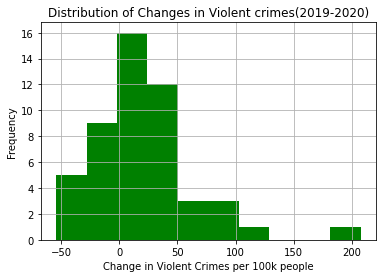

In [ ]:
# Plotted the histogram for difference in crime_rates between 2020-2019 to know how values distributed
tmp1.hist(column='Difference_in_crime_rate(2020_2019)', color="green")
plt.xlabel("Change in Violent Crimes per 100k people")
plt.ylabel("Frequency")
plt.title("Distribution of Changes in Violent crimes(2019-2020)")
plt.show()

# Q9. Compute the percentage change between 2020 and 2019 for all States and print summary statistics

This one should be a percentage, of course! Don't forget to multiply by 100. The denominator should be 2019.

In [ ]:
# Created a new column as a percentage change of crime_rates of all states between 2020-2019
tmp1["percentage_change_crimerates"]=((tmp1["2020_Violent_Crime_Rate"]-tmp1["2019_Violent_Crime_Rate"])/tmp1["2019_Violent_Crime_Rate"]*100)
tmp1.head()

<ipython-input-23-4f82676f5260>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1["percentage_change_crimerates"]=((tmp1["2020_Violent_Crime_Rate"]-tmp1["2019_Violent_Crime_Rate"])/tmp1["2019_Violent_Crime_Rate"]*100)


,State_or_Territory,2020_Incidence_Count,2020_Violent_Crime_Rate,2019_Violent_Crime_Rate,2018_Violent_Crime_Rate,2017_Violent_Crime_Rate,2016_Violent_Crime_Rate,2015_Violent_Crime_Rate,2014_Violent_Crime_Rate,2013_Violent_Crime_Rate,2012_Violent_Crime_Rate,2011_Violent_Crime_Rate,Difference_in_crime_rate(2020_2019),percentage_change_crimerates
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5,-27.2,-3.144509
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5,-45.7,-5.546117
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2,73.8,12.322591
5,Arkansas,20363.0,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6,480.9,91.1,15.685262
6,Arizona,35980.0,654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6,405.9,207.7,46.454932


In [ ]:
# Used descriptive statistics to find the mean,std, quantile ranges, min and max values of crimerates difference between 2020 & 2019
tmp1.iloc[:,-1].describe()

count    50.000000
mean      5.415681
std      11.120359
min     -16.312741
25%      -2.764665
50%       4.566601
75%      10.552274
max      46.454932
Name: percentage_change_crimerates, dtype: float64

# Q10. Make a nice boxplot or histogram for the output from Q9.

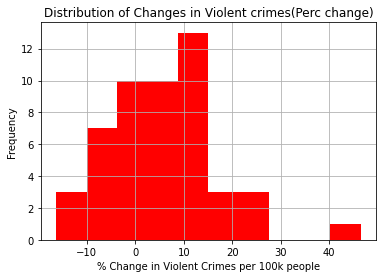

In [ ]:
# Plotted the histogram for percentage_change in crime_rates between 2020-2019 to know how it is distributed
tmp1.hist(column='percentage_change_crimerates', color="red")
plt.xlabel("% Change in Violent Crimes per 100k people")
plt.ylabel("Frequency")
plt.title("Distribution of Changes in Violent crimes(Perc change)")
plt.show()